## 6.2_2 Exploring Relationships

### Table of content

### 01. Importing Libraries and Data

### 02. Exploring Relationships

#### 02.1 Correlations

#### 02.2 Scatterplots

#### 02.3 Pair Plot

#### 02.4 Categorical Plot

### 03.Questions

### 04. Hypothesis

### 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = "/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis/02 Data/Prepared Data/"

In [3]:
# Import data

hap = pd.read_csv(os.path.join(path, 'Prepared_full.csv'))

In [4]:
hap.head()

,Unnamed: 0,country,region_id,region,Year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,File_Name
0,0,Switzerland,WE,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,wr2015.csv
1,1,Iceland,WE,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,wr2015.csv
2,2,Denmark,WE,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,wr2015.csv
3,3,Norway,WE,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,wr2015.csv
4,4,Canada,NAANZ,North America and ANZ,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,wr2015.csv


In [5]:
hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1229 non-null   int64  
 1   country                      1229 non-null   object 
 2   region_id                    1229 non-null   object 
 3   region                       1229 non-null   object 
 4   Year                         1229 non-null   int64  
 5   happiness_rank               1229 non-null   int64  
 6   happiness_score              1229 non-null   float64
 7   economy_GDP_per_capita       1229 non-null   float64
 8   family                       1229 non-null   float64
 9   health_life_expectancy       1229 non-null   float64
 10  freedom                      1229 non-null   float64
 11  trust_government_corruption  1229 non-null   float64
 12  generosity                   1229 non-null   float64
 13  dystopia_residual 

In [6]:
#dropping the column that irrelevant for the analysis
hap = hap.drop(columns = ['Unnamed: 0', 'File_Name'])

In [7]:
hap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1229 non-null   object 
 1   region_id                    1229 non-null   object 
 2   region                       1229 non-null   object 
 3   Year                         1229 non-null   int64  
 4   happiness_rank               1229 non-null   int64  
 5   happiness_score              1229 non-null   float64
 6   economy_GDP_per_capita       1229 non-null   float64
 7   family                       1229 non-null   float64
 8   health_life_expectancy       1229 non-null   float64
 9   freedom                      1229 non-null   float64
 10  trust_government_corruption  1229 non-null   float64
 11  generosity                   1229 non-null   float64
 12  dystopia_residual            1229 non-null   float64
dtypes: float64(8), int

### 02. Exploring Relationships

#### 02.1 Correlations

In [8]:
# Create a subset excluding the 'country', 'region_id', region', 'Year' and 'dystopia_residual' columns
subhap=hap[['happiness_rank', 'happiness_score', 'economy_GDP_per_capita', 'family', 'health_life_expectancy',
           'freedom', 'trust_government_corruption', 'generosity']]

In [9]:
# Create a correlation matrix using pandas
subhap.corr()

,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity
happiness_rank,1.000000,-0.988777,-0.748852,-0.627957,-0.732015,-0.549810,-0.384612,-0.073601
happiness_score,-0.988777,1.000000,0.743440,0.628276,0.727534,0.564612,0.408315,0.090289
economy_GDP_per_capita,-0.748852,0.743440,1.000000,0.490960,0.706475,0.405903,0.330929,-0.117221
family,-0.627957,0.628276,0.490960,1.000000,0.622088,0.331711,0.126999,0.006813
health_life_expectancy,-0.732015,0.727534,0.706475,0.622088,1.000000,0.334508,0.275532,-0.012343
freedom,-0.549810,0.564612,0.405903,0.331711,0.334508,1.000000,0.440022,0.190322
trust_government_corruption,-0.384612,0.408315,0.330929,0.126999,0.275532,0.440022,1.000000,0.244690
generosity,-0.073601,0.090289,-0.117221,0.006813,-0.012343,0.190322,0.244690,1.000000


In [10]:
subhap.shape

(1229, 8)

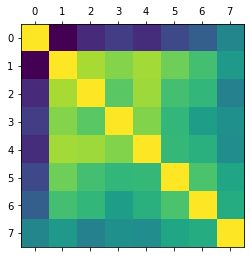

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(subhap.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

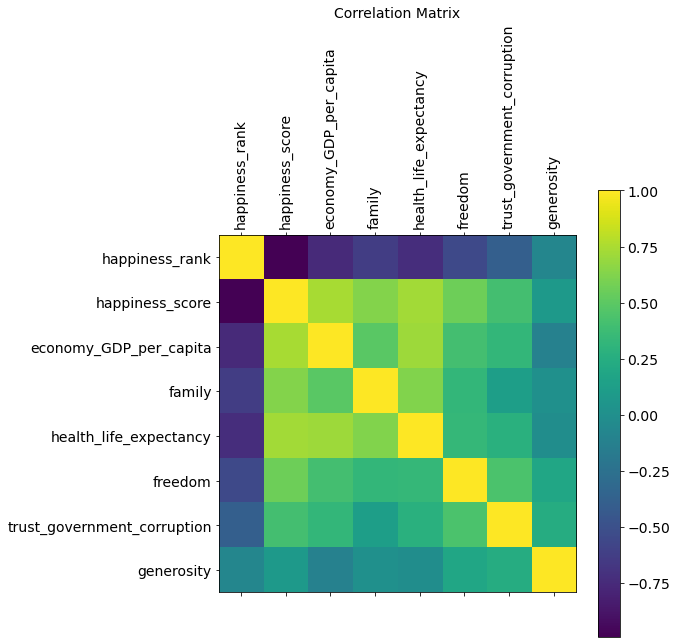

In [12]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subhap.corr(), fignum=f.number) # type of plot
plt.xticks(range(subhap.shape[1]), subhap.columns, fontsize=14, rotation = 90) # x axis labels
plt.yticks(range(subhap.shape[1]), subhap.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

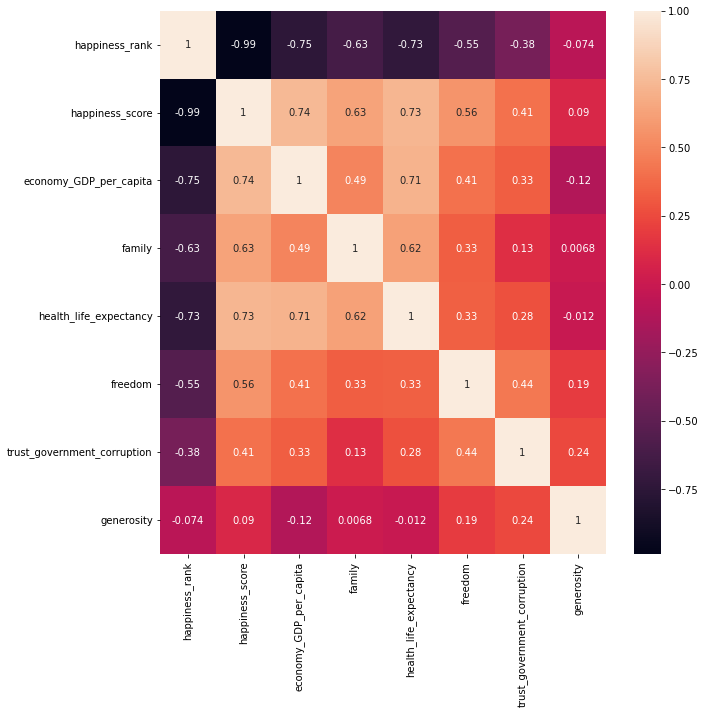

In [13]:
# Create a subplot with seaborn
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subhap.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### What is expected that the strongest negative correlaton is between happiness_rank and happiness_score due to happiness_rank indicates the happiness-score - the higher score the less rank.  
#### There is a strong positive correlation exists between happiness score and GDP per capita & life expectancy. The higher GDP and life expactancy the higher country happiness score. It is much easy to calculate because this is an objective data. 
#### The mederate-to-strong correlation exists between happiness score and family (social support) & freedom to make life choices. This data is more subjective and depends more on opinions, perception or experience. However, it is partly objective information that indicates the legislative framework and how it's applies in each country.
#### The weak/no correlation between  happiness score and trust (governement corruption) & generosity (donation/charity) due to these are two totally subjective data that based on people opinions and experience. The less people trust/generous the less they feel happy.

#### 02.2 Scatterplots

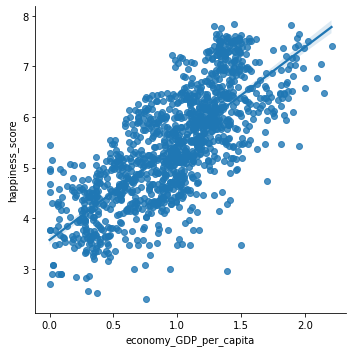

In [14]:
# Create a scatterplot for the "happiness_score" and "economy_GDP_per_capita" columns in seaborn
sns.lmplot(x = 'economy_GDP_per_capita', y = 'happiness_score', data = hap)

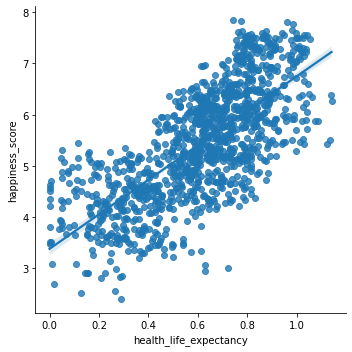

In [15]:
# Create a scatterplot for the "happiness_score" and "health_life_expectancy" columns in seaborn
sns.lmplot(x = 'health_life_expectancy', y = 'happiness_score', data = hap)

#### These two scatterplots indicate strong positive correlation between variables. The higher GDP per capita/life expecancy the higher people feel happy. The majority score GDP per capita is in the rank 0.3-1.6, the life expactancy - 0.4-1.0

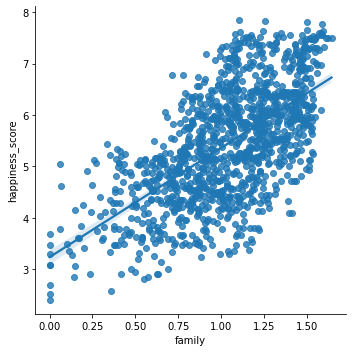

In [16]:
# Create a scatterplot for the "happiness_score" and "family" columns in seaborn
sns.lmplot(x = 'family', y = 'happiness_score', data = hap)

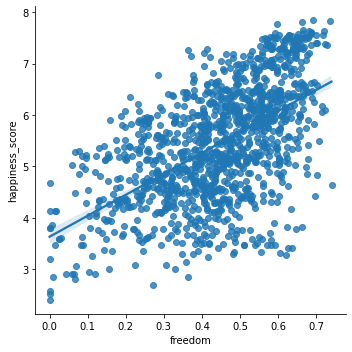

In [17]:
# Create a scatterplot for the "happiness_score" and "freedom" columns in seaborn
sns.lmplot(x = 'freedom', y = 'happiness_score', data = hap)

#### Family and freedom scatterplots indicate moderate-to-strong positive correlation between variables. We could see the more data points are not close enough to the trend line. The majority family&freedom data points are in the rank 0.6-1.5 and 0.3-0.7 respectively. it means that the higher people feel themselves happier the higher perceptions of social support and opportunity to make life choices freely. 

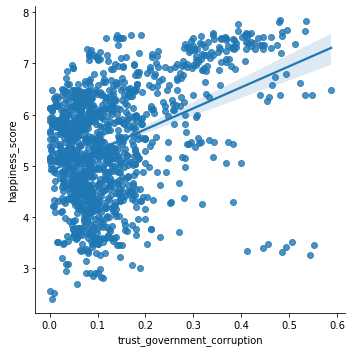

In [18]:
# Create a scatterplot for the "happiness_score" and "trust_government_corruption" columns in seaborn
sns.lmplot(x = 'trust_government_corruption', y = 'happiness_score', data = hap)

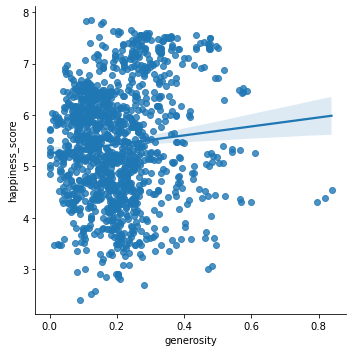

In [19]:
# Create a scatterplot for the "happiness_score" and "generosity" columns in seaborn
sns.lmplot(x = 'generosity', y = 'happiness_score', data = hap)

#### The scatterpolts trust/generosity have weak positive correlation between happiness_score. The trend lines are not very steap and there are many points far away from the lines. We could see that the most dots are up to the value 0.2 (trust) and 0.3 (generosity). Population feels less happy when the value is lower in trust and generosity.

#### 02.3 Pair Plot

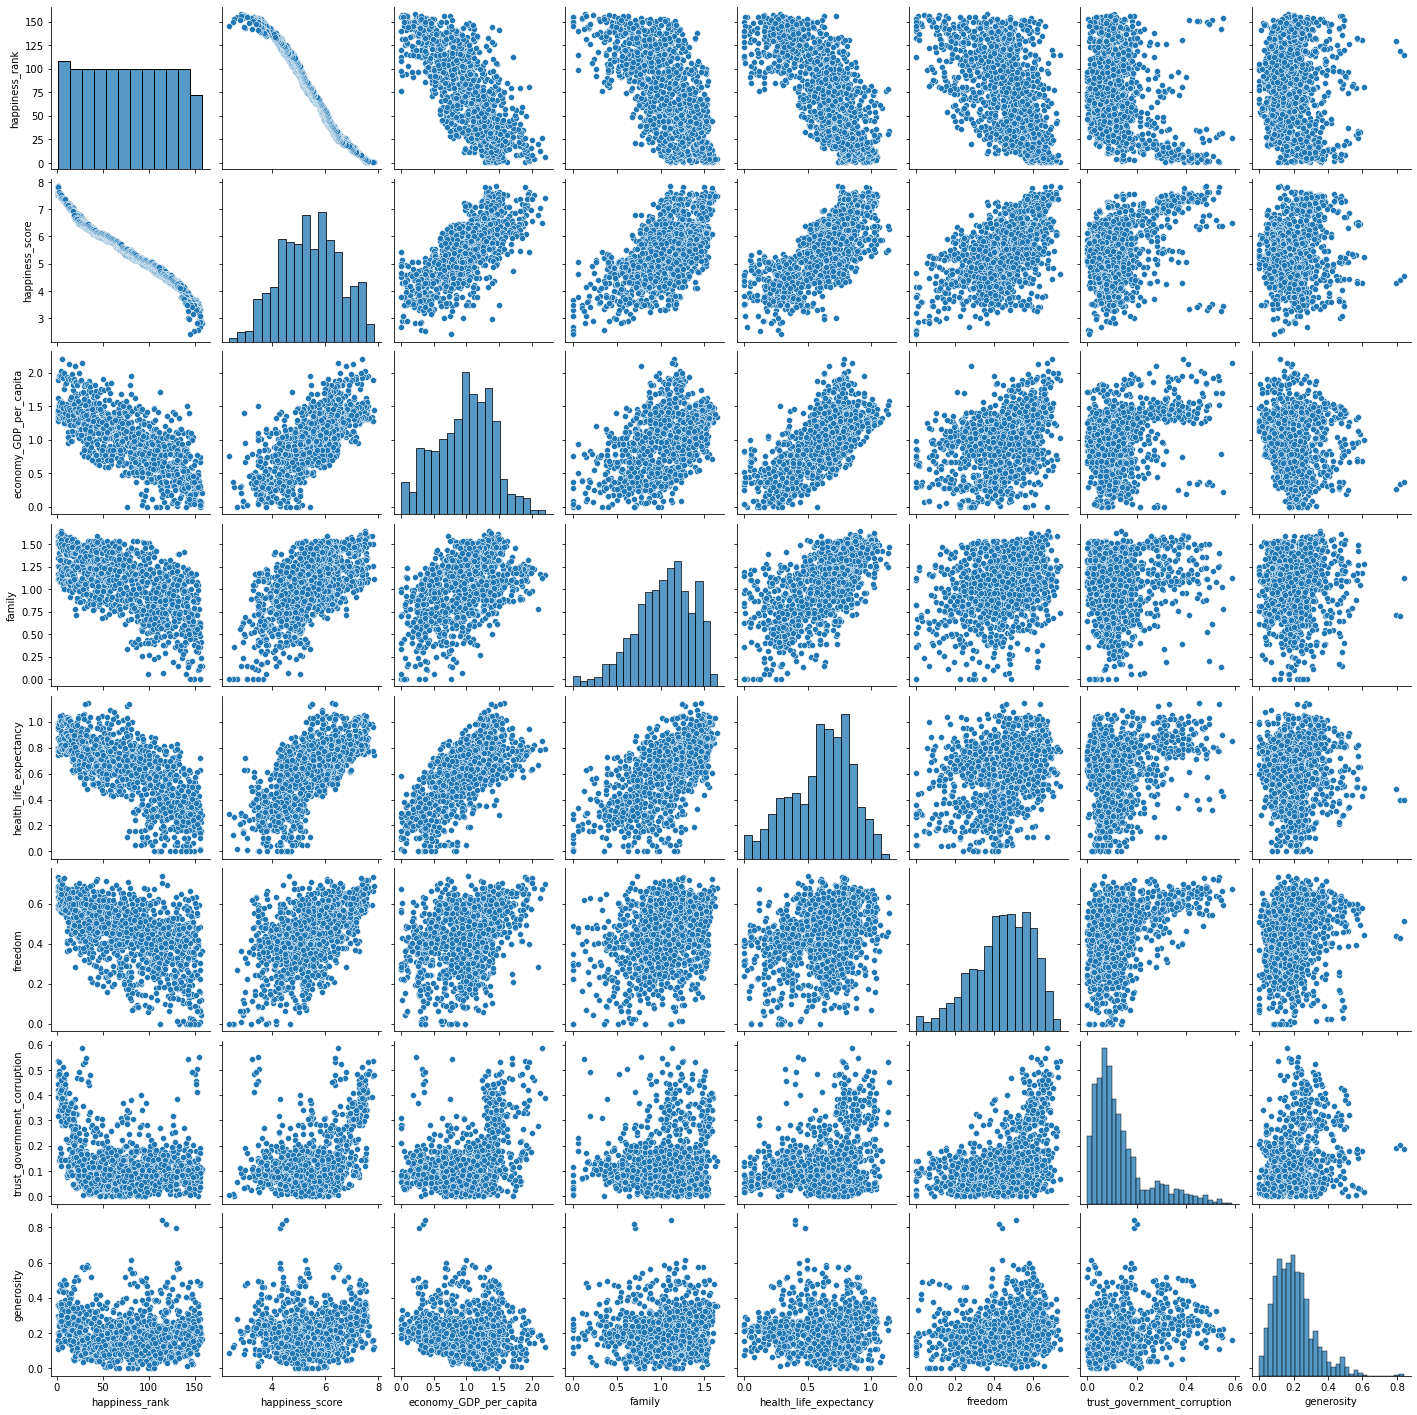

In [20]:
# Create a pair plot 
pair_plot = sns.pairplot(subhap)

#### The happiness score is pretty evenly distributed which is expected because it represents real-valued random variables in the study of societies and relationships among individuals within those societies. The trust and generosity are skewed left, family and freedom are skewed right while GDP & life expectancy are pretty evenly distributed. The strongest impact on the happiness score has GDP and life expectancy. 
#### I would like to explore further variables such as trust, family and life expectancy because it is clear that less GDP per capita countries are going to be unhappy. Just because a country is a world power it might not mean the people are happy.  How people perception of their happiness does affect by their experience of accessibility to healthcare and social support from the government along with a corruption level of countries.

In [21]:
# Exporting pair plot
pair_plot.figure.savefig(os.path.join('/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis/', '04 Analysis','pair_plot.png'),bbox_inches='tight')

#### 02.4 Categorical Plot

<AxesSubplot:xlabel='happiness_score', ylabel='Count'>

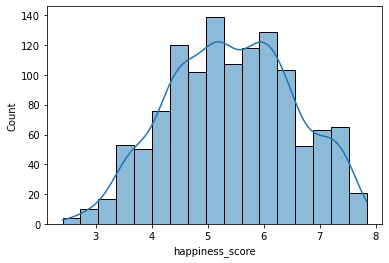

In [22]:
# Create a histogram of happiness_score 
sns.histplot(subhap['happiness_score'], bins = 17, kde = True)

In [23]:
# Create a categorical variable that splits 'happiness_score' column into categories
hap.loc[hap['happiness_score'] < 4, 'happiness_category'] = 'low'

In [24]:
hap.loc[(hap['happiness_score'] >=4) & (hap['happiness_score'] <5.5), 'happiness_category'] = 'middle-low'

In [25]:
hap.loc[(hap['happiness_score'] >=5.5) & (hap['happiness_score'] <7), 'happiness_category'] = 'middle-high'

In [26]:
hap.loc[hap['happiness_score'] >= 7, 'happiness_category'] = 'high'

In [27]:
hap['happiness_category'].value_counts(dropna = False)

middle-low     508
middle-high    466
low            134
high           121
Name: happiness_category, dtype: int64

In [28]:
hap.columns

Index(['country', 'region_id', 'region', 'Year', 'happiness_rank',
       'happiness_score', 'economy_GDP_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual', 'happiness_category'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America and ANZ'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Southeast Asia'),
  Text(5, 0, 'Central and Eastern Europe'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'East Asia'),
  Text(9, 0, 'Sub-Saharan Africa')])

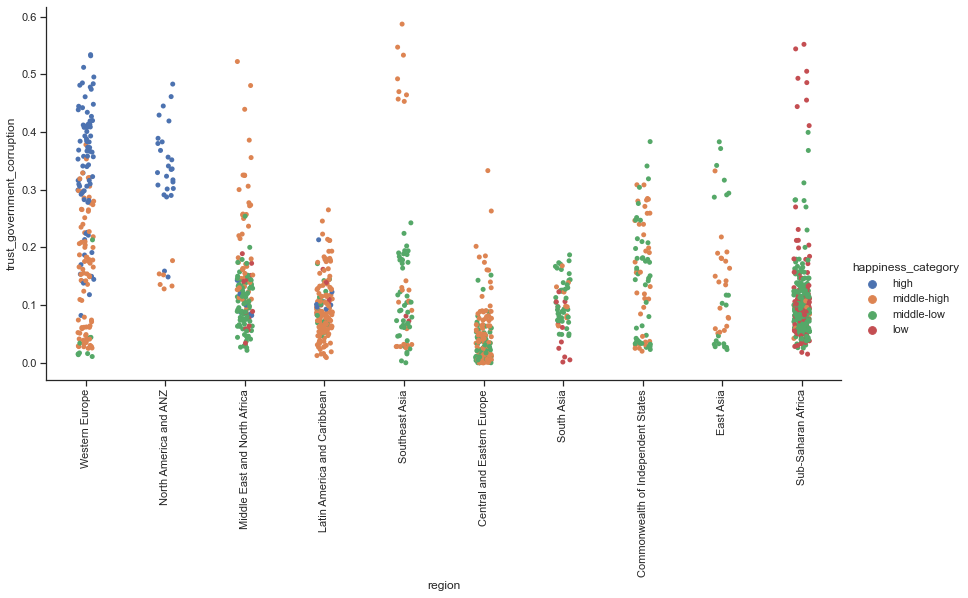

In [29]:
# Create a categorical plot in seaborn using the happiness categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="region", y="trust_government_corruption", hue="happiness_category", height=6, aspect=2, data=hap)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America and ANZ'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Southeast Asia'),
  Text(5, 0, 'Central and Eastern Europe'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'East Asia'),
  Text(9, 0, 'Sub-Saharan Africa')])

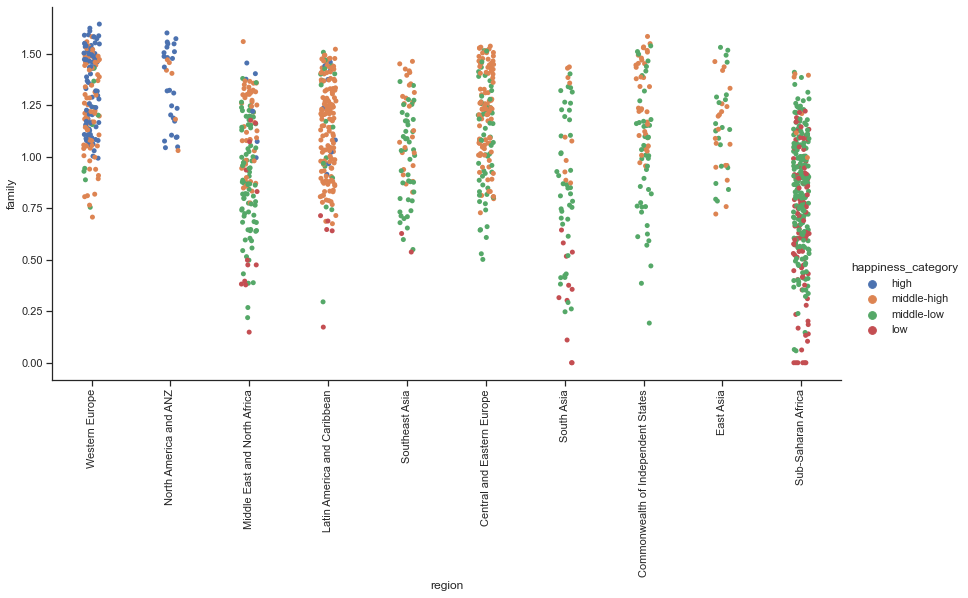

In [30]:
# Create a categorical plot in seaborn using the happiness categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="region", y="family", hue="happiness_category", height=6, aspect=2, data=hap)
plt.xticks (rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America and ANZ'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Southeast Asia'),
  Text(5, 0, 'Central and Eastern Europe'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'East Asia'),
  Text(9, 0, 'Sub-Saharan Africa')])

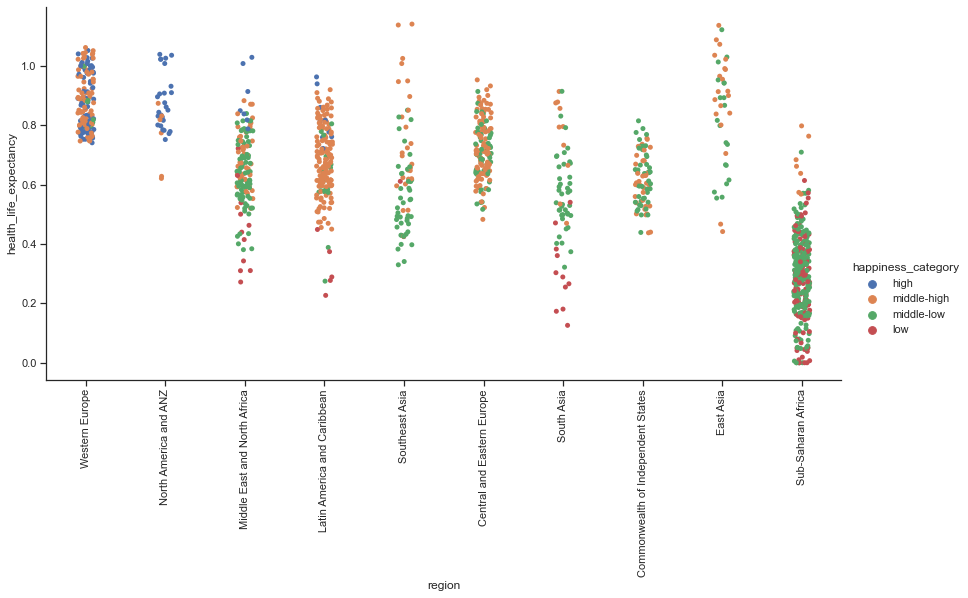

In [31]:
# Create a categorical plot in seaborn using the happiness categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="region", y="health_life_expectancy", hue="happiness_category", height=6, aspect=2, data=hap)
plt.xticks (rotation=90)

#### The categorical plots by trust, family and health expactancy show that most happier countries are in Western Europe, North America and Ausstralia &New Zeland and fewer in Middle East&North Africa. The majority less happier people live in  Africa and South & South East Asia. It is expected because it is strongly correlated with GDP per capita of the country.

In [32]:
#Exporting file
hap.to_csv(os.path.join(path, 'hap_full_categor.csv'))

### 03.Questions

#### Which region/countries are the happiest?
#### Based on the exploration, we can confirm that majority of countries in Western Europe, North America & ANZ and fewer countries in Middle East & North Africa and Latin America & Carrbbean have the high score of happiness. Third-world, poverty-stricken countries, typically in Africa, are the least happy in the world. 


#### The following questions have arisen based on the exploration:
#### How trust, family and life expectancy affects the happiness score for top and bottom 20 countries?
#### What countries in Western Europe have happiness category middle-low and what countries in Middle East & North Africa and Latin America & Caribbean have happiness category high and what could be the reasons?
#### What countries in Western Europe have low score of trust and why?

### 04. Hypothesis

#### H0 If a country life expectancy score is less than median, then the country is more likely to have a higher happiness score
#### H1 If a country life expectancy score is higher than median, then the country is more likely to have a higher happiness score